![](Cintilla.png)

# Inteligencia Artificial
## Arboles de Decision Dataset TITANIC

## Nombre Del Docente
### José Gabriel Rodriguez Rivas

## Nombre Del Alumno
### Lisley Evelyn Hernández Félix

# Aspectos básicos/situación de la Practica
*En esta práctica de laboratorio creará un clasificador de árbol de decisiones que funcione con un conjunto de datos que contenga detalles sobre los más de 1300 pasajeros que estaban a bordo del trasatlántico Titanic durante su trágico primer viaje.*

**Con los datos de arriba, ¿qué tipos de preguntas podemos hacer acerca de los factores que contribuyeron a que los pasajeros sobrevivan o fallecieran en la catástrofe del Titanic?**

*CUANTAS PERSONAS CON SEXO MUJER SOBREVIVIERON? Y CUANTOS NIÑOS HOMBRES SOBREVIVIERON?*

In [1]:
#import pandas
import pandas as pd

#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("titanic-train.csv")

In [2]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
PassengerId    915 non-null int64
Survived       915 non-null int64
Pclass         915 non-null int64
Name           915 non-null object
Gender         915 non-null object
Age            738 non-null float64
SibSp          915 non-null int64
Parch          915 non-null int64
Ticket         915 non-null object
Fare           915 non-null float64
Cabin          202 non-null object
Embarked       914 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


**¿Faltan valores en el conjunto de datos?**

*Si hay valores nulos en la edad y la cabina.*

### Paso 2: Preparar los datos para el modelo de árbol de decisiones

In [4]:
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [5]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [6]:
training["Age"].fillna(training["Age"].mean(), inplace=True)

In [7]:
training

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.000000,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,29.970867,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.000000,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
910,911,0,3,"Baccos, Mr. Raffull",0,20.000000,0,0,2679,7.2250,NaN,C
911,912,0,1,"Smith, Mr. Richard William",0,29.970867,0,0,113056,26.0000,A19,S
912,913,0,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,NaN,S
913,914,0,3,"Johnson, Mr. Alfred",0,49.000000,0,0,LINE,0.0000,NaN,S


In [8]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
PassengerId    915 non-null int64
Survived       915 non-null int64
Pclass         915 non-null int64
Name           915 non-null object
Gender         915 non-null int64
Age            915 non-null float64
SibSp          915 non-null int64
Parch          915 non-null int64
Ticket         915 non-null object
Fare           915 non-null float64
Cabin          202 non-null object
Embarked       914 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 85.9+ KB


## ¿Cuál es el valor que se utilizó para reemplazar a las edades faltantes?

 #### *29*

### Paso 3: Entrenar y calificar el modelo del árbol de decisiones.

In [9]:
#create the array for the target values
y_target = training["Survived"].values

In [10]:
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [11]:
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

#### Evalúe el modelo.
Utilice el método score() del objeto del árbol de decisiones para mostrar la precisión del porcentaje de las asignaciones realizadas por el clasificador. Este método considera las variables de entrada y salida como argumentos.

In [12]:
clf_train.score(X_input,y_target)

0.8163934426229508

#### Visualizacion de el árbol

In [49]:
clasificacion=['No Sobrevive', 'Sobrevive']

In [50]:
import sklearn
#from sklearn.externals.six import StringIO
with open("titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)

In [51]:
!dot -Tpng titanic.dot -o titanic.png

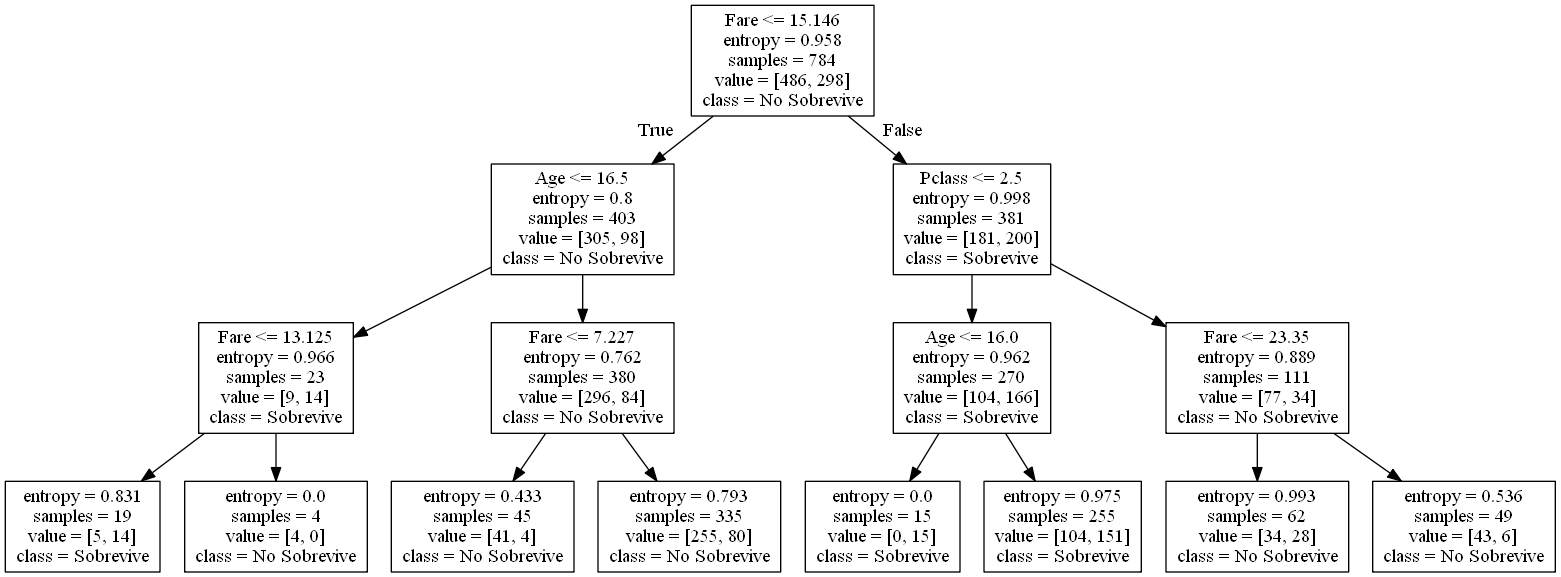

In [52]:
from IPython.display import Image

#display the decison tree graphic
Image("titanic.png")

## ¿Qué describe al grupo que tenía mayor cantidad de víctimas fatales? ¿Qué grupo tenía la mayor cantidad de sobrevivientes?

### *La mayor de cantidad de victimas fatales tenian una cantidad baja de tarifa abonada por ticket y  y la edad influia tambien los menores a 16 años.*

### Parte 2: Aplicar el modelo del árbol de decisiones

In [16]:
testing = pd.read_csv("titanic-test.csv")
testing

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C
2,918,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
388,1304,0,3,"Thomas, Mr. Charles P",male,NaN,1,0,2621,6.4375,NaN,C
389,1305,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C
390,1306,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
391,1307,0,3,"Holthen, Mr. Johan Martin",male,28.0,0,0,C 4001,22.5250,NaN,S


### ¿Cuántos registros hay en el conjunto de datos?

### *393*

### ¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

#### *No hace falta niniguna*

In [17]:
#replace the Gender labels in the testing dataframe
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [18]:
#Use the fillna method of the testing dataframe column "Age" 
#to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

In [19]:
testing.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.00000,0,0,W./C. 14263,10.5000,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.00000,1,1,16966,134.5000,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.00000,0,0,SOTON/OQ 3101317,7.2500,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.00000,1,0,19928,90.0000,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,NaN,S
5,921,0,3,"Abbott, Mr. Rossmore Edward",0,16.00000,1,1,C.A. 2673,20.2500,NaN,S
6,922,0,3,"Karlsson, Mr. Nils August",0,22.00000,0,0,350060,7.5208,NaN,S
7,923,0,3,"Connaghton, Mr. Michael",0,31.00000,0,0,335097,7.7500,NaN,Q
8,924,0,3,"Foley, Mr. William",0,29.56569,0,0,365235,7.7500,NaN,Q
9,925,0,2,"Leyson, Mr. Robert William Norman",0,24.00000,0,0,C.A. 29566,10.5000,NaN,S


In [20]:
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

#### Hacer predicciones con el metodo predict() del clasificador

Utilice el método predict() del objeto clf_train que se entrenó para etiquetar las observaciones en el conjunto de datos de prueba con la clasificación de supervivencia más probable. Considere el arreglo de variables de entrada del conjunto de datos de prueba como el parámetro para este método.

In [21]:
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

In [22]:
target_labels.head()

,Est_Survival,Name
0,0,"Coleridge, Mr. Reginald Charles"
1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
2,0,"Windelov, Mr. Einar"
3,1,"Minahan, Miss. Daisy E"
4,0,"Wilkes, Mrs. James (Ellen Needs)"


In [23]:
#import the numpy library as np
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
acc

0.7588832487309645

In [24]:
all_data.head()

,Passenger,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,3,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,4,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,5,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


### Parte 3: Evaluar el modelo del árbol de decisiones

In [63]:
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,female,29.0000,0,211.3375
1,1,1,male,0.9167,1,151.5500
2,0,1,female,2.0000,1,151.5500
3,0,1,male,30.0000,1,151.5500
4,0,1,female,25.0000,1,151.5500


### ¿Cuántos registros hay en el conjunto de datos?

### *1308*

### ¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

#### *Ninguna porque los valores que estan son los necesarios para evaluar el arbol*

In [38]:
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [39]:
all_data["Age"].fillna(training["Age"].mean(), inplace=True)
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,1,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,1,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


In [40]:
#Import train_test_split() from the sklearn.model_selection libary 
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [41]:
type(X_train)

numpy.ndarray

In [42]:
X_train

array([[ 8.05      ,  3.        ,  1.        , 18.        ,  0.        ],
       [76.7292    ,  1.        ,  1.        , 48.        ,  1.        ],
       [35.        ,  1.        ,  1.        , 29.97086721,  0.        ],
       ...,
       [ 7.7333    ,  3.        ,  1.        , 29.97086721,  0.        ],
       [36.75      ,  2.        ,  1.        , 20.        ,  0.        ],
       [15.5       ,  3.        ,  1.        , 32.        ,  1.        ]])

In [43]:
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

In [44]:
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.7104591836734694 Testing score = 0.6851145038167938


### Tarea

**Eliminar las observaciones con valores de edad faltantes**

El uso de un promedio para reemplazar los valores de edad faltantes puede afectar la precisión del modelo. Una solución para esto puede ser eliminar todas las observaciones con valores de edad faltantes. Si bien esto reducirá el tamaño del conjunto de datos de entrenamiento, podría mejorar la precisión.

In [45]:
training = pd.read_csv("titanic-train.csv")
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [46]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [47]:
training.dropna(subset=['Age'], inplace=True)

In [48]:
training

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S
5,6,0,2,"Bowenur, Mr. Solomon",0,42.0,0,0,211535,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
907,908,0,2,"Fillbrook, Mr. Joseph Charles",0,18.0,0,0,C.A. 15185,10.5000,NaN,S
909,910,0,3,"Crease, Mr. Ernest James",0,19.0,0,0,S.P. 3464,8.1583,NaN,S
910,911,0,3,"Baccos, Mr. Raffull",0,20.0,0,0,2679,7.2250,NaN,C
912,913,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S


In [53]:
y_target = training["Survived"].values

In [54]:
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [55]:
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

In [56]:
clf_train.score(X_input,y_target)

0.8252032520325203

In [57]:
clasificacion=['No Sobrevive', 'Sobrevive']

In [58]:
import sklearn
#from sklearn.externals.six import StringIO
with open("titanic2.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names=clasificacion)

In [59]:
!dot -Tpng titanic2.dot -o titanic2.png

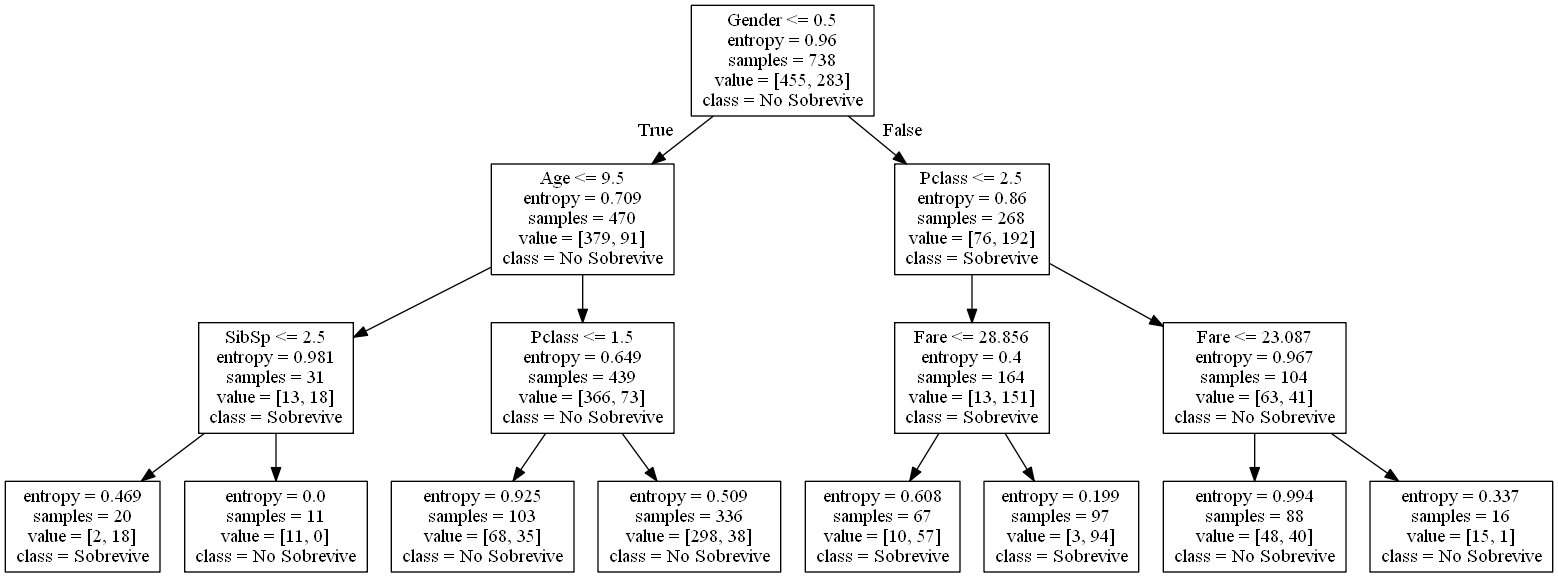

In [60]:
from IPython.display import Image

#display the decison tree graphic
Image("titanic2.png")

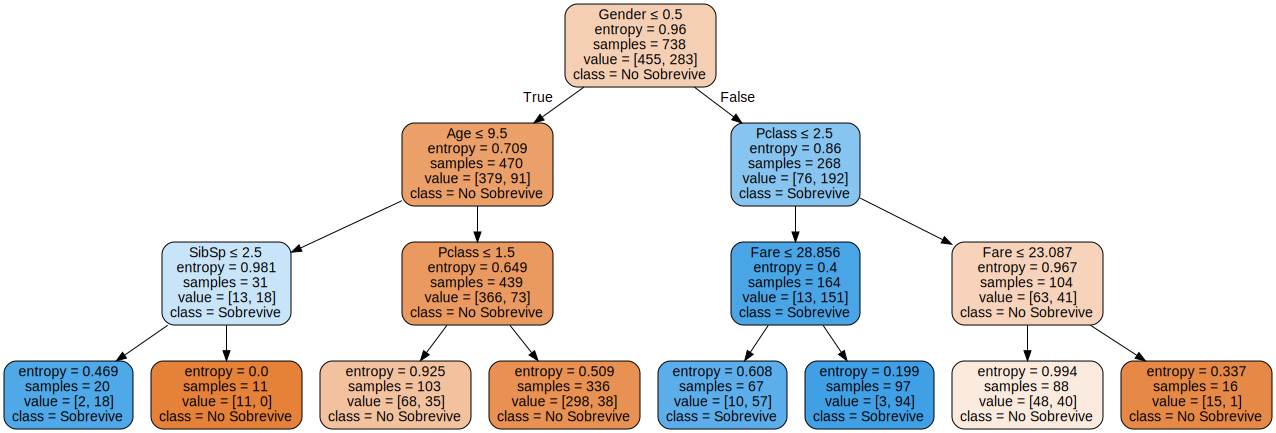

In [64]:
import graphviz
dot_data = tree.export_graphviz(clf_train, out_file=None,   
                         class_names=clasificacion,
                         feature_names=columns,
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("TitanicColor", format='png')
graph

#### Diferencias que se obtuvieron al ejecutar el entrenamiento eliminando los valores nulos.

#### *Los datos que nos muestras nos mas exactos y un poco mas rapidos, ya que tambien nos da un  porcentaje de las asignaciones realizadas y un aumento del 81% al 82% y que la mayoria que sobrevivieron fueron las mujeres*